In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-dataset/Housing.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
house=pd.read_csv('../input/housing-dataset/Housing.csv')
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


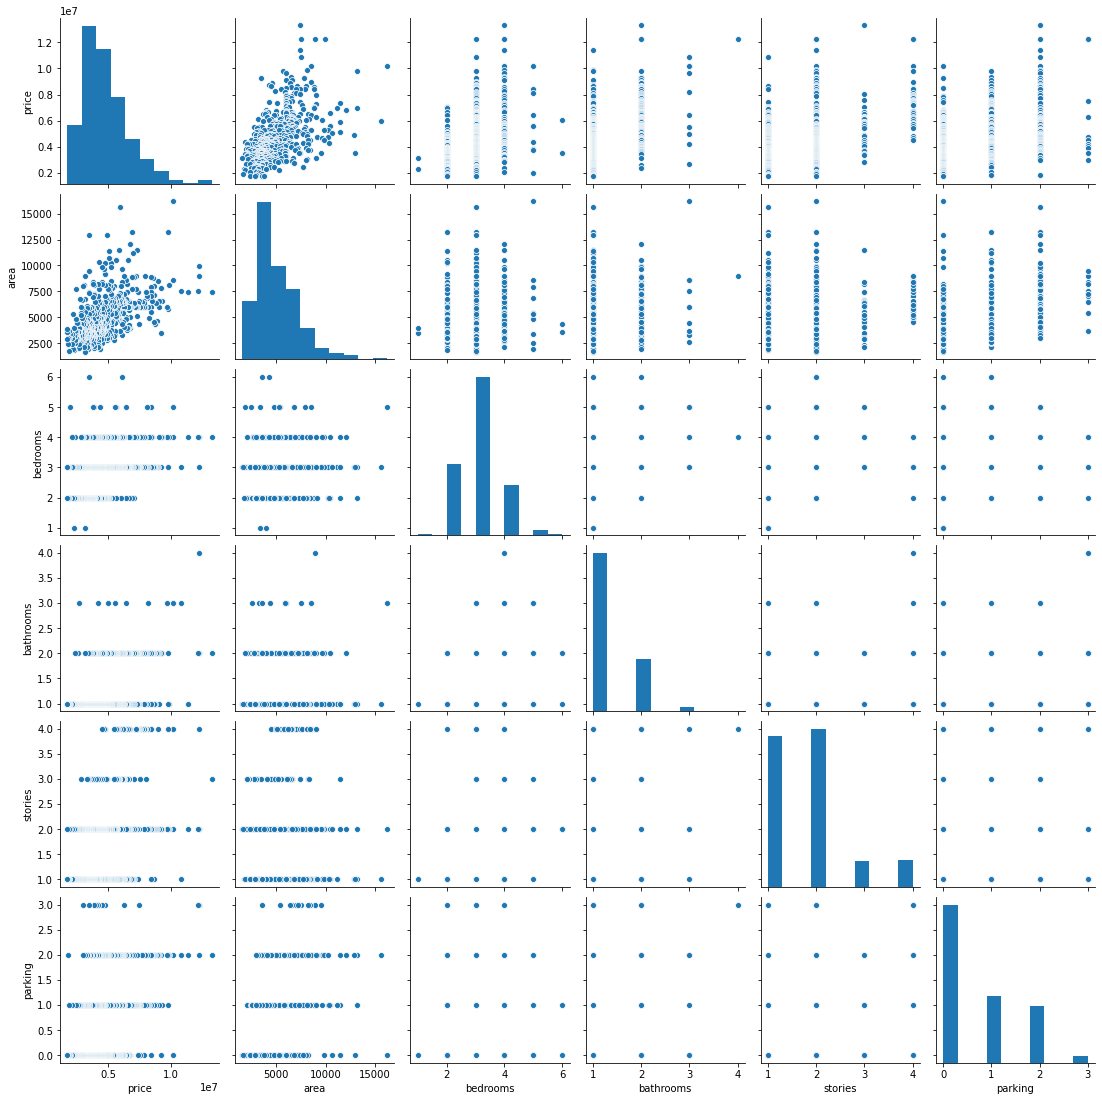

In [5]:
sns.pairplot(house)

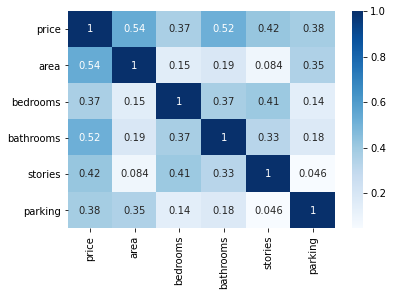

In [6]:
sns.heatmap(house.corr(), cmap="Blues", annot=True)

In [7]:
house.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
X=house[['area', 'stories', 'bathrooms']]
y=house['price']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.35)

In [12]:
regg=LinearRegression()

In [13]:
regg.fit(X_train, y_train)

LinearRegression()

In [14]:
regg.coef_

array([3.61518137e+02, 5.45176194e+05, 1.18411006e+06])

In [15]:
pred=regg.predict(x_test)

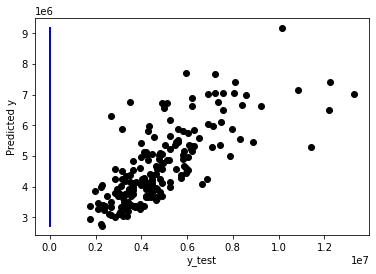

In [19]:
plt.scatter(y_test, pred, color='black')
plt.plot(x_test,pred, color='blue')
plt.plot()
plt.xlabel("y_test")
plt.ylabel("Predicted y")
plt.show()

In [21]:
from sklearn import metrics

In [22]:
print("Root mean absolute error", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared error",metrics.mean_squared_error(y_test, pred))
print("Root mean squared error", np.sqrt(metrics.mean_squared_error(y_test, pred)))

Root mean absolute error 928602.2057764875
Mean Squared error 1880469897863.8652
Root mean squared error 1371302.2634940355


In [23]:
coef=pd.DataFrame(regg.coef_, X.columns)
coef.columns=["Coeficients"]
coef

,Coeficients
area,3.615181e+02
stories,5.451762e+05
bathrooms,1.184110e+06


**Here WE can see that Increase one unit of area, stories, bathrooms, will increase the price by th respective unit**

In [24]:
metrics.r2_score(y_test, pred)

0.5293636013352392

In [26]:
metrics.max_error(y_test, pred)

6269903.078741517

In [28]:
metrics.mean_squared_error(y_test, pred)


1880469897863.8652

In [30]:
metrics.mean_squared_log_error(y_test, pred)

0.06457202947073899

In [32]:
	
metrics.mean_poisson_deviance(y_test,pred)

324166.9637604743

AttributeError: module 'sklearn.metrics' has no attribute 'mean_absolute_percentage_error'